# Cvičení 2 - Catplot

Další zajímavý graf, který seaborn umí, je catplot. Pomocí něj můžeme porovnat obsat výživných látek pro jednotlivé kategorie potravin. Tvým úkolem bude porovnat obsah proteinů a karbohydrátů pro 12 nejčastějších kategorií.

Vytvoř si pomocí dotazu tabulku, ve které budou informace pouze o proteinech a karbohydrátech. Karbohydráty hledej pod názvem Carbohydrate, by difference. Můžeš je přejmenovat na "Karbohydráty" pomocí metody replace.

Dále použij funkci catplot. Její použití je velmi podobné ostatním funkcím. Jako první parametr zadej tabulku s daty, jako parametr x sloupeček s názvem kategorie (branded_food_category), jako parametr y sloupeček amount a jako parametr hue sloupeček nutrition_name. Alternativně můžeš před vygenerováním grafu sloupeček nutrition_name přejmenovat například na Výživná látka, protože bude použit jako nadpis legendy.

Nech si zobrazit graf. Jednotlivé tečky představují hodnoty pro jednotlivé potraviny, každá tečka reprezentuje jednu potravinu. Barva tečky určuje, o jakou výživnou látku jde. Dále zkus přidat k volání funkce catplot parametr s s hodnotou 2 a podívej se, jak se graf změnil. Zkus případně i jiné hodnoty tohoto parametru.

Prohlédni si graf a odpověz na otázky:

1. Pro jakou kategorii platí, že drtivá většina výrobků má více proteinů než karbohydrátů?

2. Pro jakou kategorii platí, že drtivá většina výrobků má více karbohydrátů než proteinů?

3. Existuje nějaká kategorie, kde je na výběr alespoň několik produktů s větším množství karbohydrátů než proteinů, ale i několik produktů s větším množstvím proteinů než karbohydrátů?


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
food_brands_nut = pd.read_csv(r'C:\Users\Daniel Rabiencný\OneDrive\Dokumenty\CZECHITAS-LAPTOP-BTGJD9J5\Python pro datovou analýzu\lekce4_cviceni\food_brands_nut.csv')
food_top_cat = pd.read_csv(r'C:\Users\Daniel Rabiencný\OneDrive\Dokumenty\CZECHITAS-LAPTOP-BTGJD9J5\Python pro datovou analýzu\lekce4_cviceni\food_top_cat.csv')

C:\Users\Daniel Rabiencný\AppData\Local\Temp\ipykernel_24544\2088451556.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  food_brands_nut = pd.read_csv(r'C:\Users\Daniel Rabiencný\OneDrive\Dokumenty\CZECHITAS-LAPTOP-BTGJD9J5\Python pro datovou analýzu\lekce4_cviceni\food_brands_nut.csv')
C:\Users\Daniel Rabiencný\AppData\Local\Temp\ipykernel_24544\2088451556.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  food_top_cat = pd.read_csv(r'C:\Users\Daniel Rabiencný\OneDrive\Dokumenty\CZECHITAS-LAPTOP-BTGJD9J5\Python pro datovou analýzu\lekce4_cviceni\food_top_cat.csv')


In [4]:
food_top_cat["nutrient_name"] = food_top_cat["nutrient_name"].replace({"Carbohydrate, by difference": "Karbohydráty"})

food_top_cat_proteins_carbs = food_top_cat[food_top_cat["nutrient_name"].isin(["Protein", "Karbohydráty"])]

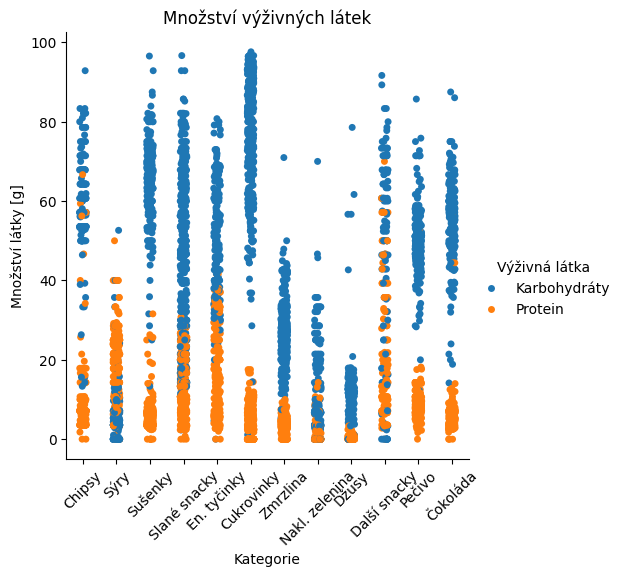

In [5]:
# Přejmenování sloupce "nutrient_name"
food_top_cat_proteins_carbs = food_top_cat_proteins_carbs.rename(columns={"nutrient_name": "Výživná látka"})

# Graf (catplot = categorical plot)
ax = sns.catplot(food_top_cat_proteins_carbs, x="branded_food_category", y="amount", hue="Výživná látka")

ax.tick_params(axis='x', rotation=45)
ax.set(xlabel="Kategorie", 
       ylabel="Množství látky [g]", 
       title="Množství výživných látek",
       # ylim=(0,200)         # Bonus: nastavení rozsahu osy
       )

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

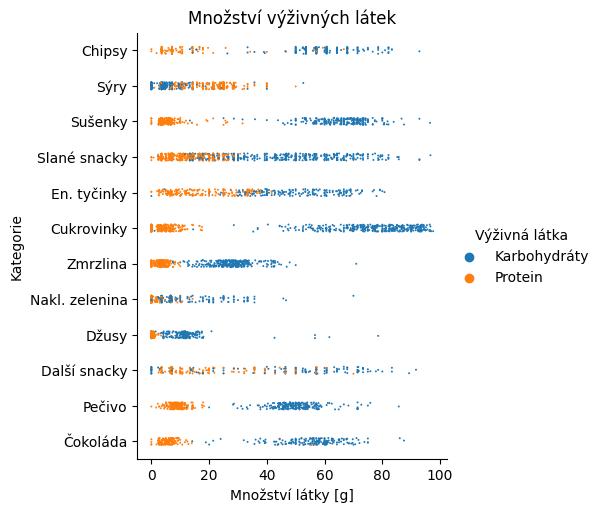

In [11]:
# Vyzkoušíme parametr s=2 (size) a rovnou prohodíme data x a y pro horizontální zobrazení:
ax = sns.catplot(food_top_cat_proteins_carbs, x="amount", y="branded_food_category", hue="Výživná látka", s=2)

ax.set(xlabel="Množství látky [g]", 
       ylabel="Kategorie", 
       title="Množství výživných látek")


Prohlédni si graf a odpověz na otázky:

- Pro jakou kategorii platí, že drtivá většina výrobků má více proteinů než karbohydrátů? --> pro sýry
- Pro jakou kategorii platí, že drtivá většina výrobků má více karbohydrátů než proteinů? --> cukrovinky, pečivo, čokoláda, apod.
- Existuje nějaká kategorie, kde je na výběr alespoň několik produktů s větším množství karbohydrátů než proteinů, ale i několik produktů s větším množstvím proteinů než karbohydrátů? --> např. sýry, další snacky, chipsy